# Bank External Consultancy

In [1]:
#libraries to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [16]:
#Data import 
dfall = pd.read_csv('C:/Users/Carla/Desktop/Projects/Bank Savings/Bank and External Consultancy Companies1.csv')
dfall.head()

,Key,Division,Team,Project,Consultancy Company,Budget,Amount paid,Payment date,Extra charges
0,London Branch_Credit Risk_A_Company CC,London Branch,Credit Risk,A,Company CC,50000.0,10000.0,31-03-2021,NaN
1,London Branch_Credit Risk_A_Company CC,London Branch,Credit Risk,A,Company CC,NaN,10000.0,30-04-2021,NaN
2,London Branch_Credit Risk_A_Company CC,London Branch,Credit Risk,A,Company CC,NaN,10000.0,31-05-2021,NaN
3,London Branch_Credit Risk_A_Company CC,London Branch,Credit Risk,A,Company CC,NaN,10000.0,30-06-2021,NaN
4,London Branch_Credit Risk_A_Company CC,London Branch,Credit Risk,A,Company CC,NaN,10000.0,31-07-2021,NaN


In [3]:
dfdesc = pd.read_csv('C:/Users/Carla/Desktop/Projects/Bank Savings/Bank and External Consultancy Companies2.csv')
dfdesc.head()

,Key,Division,Team,Project,Consultancy Company,Charges,Description
0,London Branch_Finance_B_Company CC,London Branch,Finance,B,Company CC,135000,Original Agreement
1,London Branch_Finance_B_Company CC,London Branch,Finance,B,Company CC,2500,Change Request
2,London Branch_Finance_B_Company CC,London Branch,Finance,B,Company CC,2500,Change Request
3,London Branch_Finance_B_Company CC,London Branch,Finance,B,Company CC,10000,Help Desk
4,London Branch_Savings_C_Company S,London Branch,Savings,C,Company S,15000,Original Agreement


In [5]:
dfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Key                  115 non-null    object 
 1   Division             115 non-null    object 
 2   Team                 115 non-null    object 
 3   Project              115 non-null    object 
 4   Consultancy Company  115 non-null    object 
 5   Budget               26 non-null     float64
 6   Amount paid          103 non-null    float64
 7   Payment date         115 non-null    object 
 8   Extra charges        16 non-null     float64
dtypes: float64(3), object(6)
memory usage: 8.2+ KB


In [28]:
# Changing date to datetime to allow use in analysis
dfall['Payment date'] = pd.to_datetime(dfall['Payment date']).dt.date

In [6]:
dfall.describe()

,Budget,Amount paid,Extra charges
count,26.000000,103.000000,16.000000
mean,139576.923077,26961.165049,6484.375000
std,131710.036999,17348.177465,4372.707733
min,10000.000000,5000.000000,750.000000
25%,50000.000000,15000.000000,2875.000000
50%,125000.000000,25000.000000,5000.000000
75%,150000.000000,30000.000000,10000.000000
max,450000.000000,100000.000000,15000.000000


In [7]:
dfdesc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Key                  55 non-null     object
 1   Division             55 non-null     object
 2   Team                 55 non-null     object
 3   Project              55 non-null     object
 4   Consultancy Company  55 non-null     object
 5   Charges              55 non-null     int64 
 6   Description          55 non-null     object
dtypes: int64(1), object(6)
memory usage: 3.1+ KB


### Budget Data Overview

In [8]:
#Budget information
subdfall = dfall[['Division','Team','Project','Budget']]
subdfall.groupby(['Division','Team','Project']).sum()

Budget
Division          Team             Project          
Bath Branch       Credit Risk      O         10000.0
                  Finance          P        125000.0
                  Savings          Q         62000.0
Bristol Branch    Credit Risk      E         10000.0
                  Customer Service H        150000.0
                  Finance          F        125000.0
                  Savings          G         62000.0
Leeds Branch      Customer Service Z         10000.0
                  Savings          Y        300000.0
Liverpool Branch  BI               S        300000.0
                  Credit Risk      R        150000.0
London Branch     Credit Risk      A         50000.0
                  Finance          B        135000.0
                  LTL              D        300000.0
                  Savings          C         15000.0
Manchester Branch Finance          U         50000.0
                  Marketing        T        150000.0
                  Savings          V        135000.0
Oxford Branch     BI               N        300000.0
                  Credit Risk      I         75000.0
                  Finance          J         50000.0
                  Marketing        L        450000.0
                  STL              M         15000.0
                  Savings          K        135000.0
Wales Branch      Credit Risk      W        450000.0
                  Finance          X         15000.0

In [39]:
#Division Budget information
subdfall = dfall[['Division','Team','Project','Budget']]
division = subdfall.groupby(['Division']).sum()
division.sort_values(by='Budget',inplace=True, ascending=False)
division

,Budget
Division,
Oxford Branch,1025000.0
London Branch,500000.0
Wales Branch,465000.0
Liverpool Branch,450000.0
Bristol Branch,347000.0
Manchester Branch,335000.0
Leeds Branch,310000.0
Bath Branch,197000.0


[Text(0, 0, 'Oxford Branch'),
 Text(1, 0, 'London Branch'),
 Text(2, 0, 'Wales Branch'),
 Text(3, 0, 'Liverpool Branch'),
 Text(4, 0, 'Bristol Branch'),
 Text(5, 0, 'Manchester Branch'),
 Text(6, 0, 'Leeds Branch'),
 Text(7, 0, 'Bath Branch')]

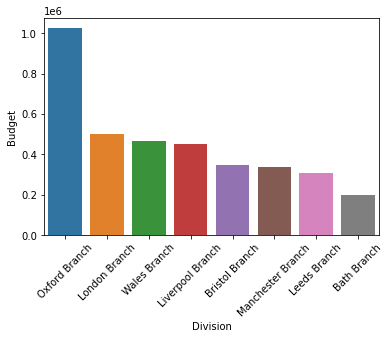

In [43]:
divisionind = division.reset_index()
chart = sn.barplot( data = divisionind, x = 'Division', y = 'Budget')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

In [10]:
#Team Budget information
subdfall = dfall[['Division','Team','Project','Budget']]
team = subdfall.groupby(['Team']).sum()
team.sort_values('Budget')

,Budget
Team,
STL,15000.0
Customer Service,160000.0
LTL,300000.0
Finance,500000.0
BI,600000.0
Marketing,600000.0
Savings,709000.0
Credit Risk,745000.0


In [11]:
#Project Budget information
subdfall = dfall[['Division','Team','Project','Budget']]
proj = subdfall.groupby(['Project']).sum()
proj.sort_values('Budget')

,Budget
Project,
Z,10000.0
O,10000.0
E,10000.0
X,15000.0
M,15000.0
C,15000.0
A,50000.0
U,50000.0
J,50000.0


<AxesSubplot:xlabel='Project', ylabel='Budget'>

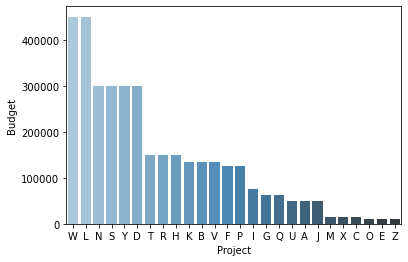

In [35]:
newproj = proj.reset_index()
newproj.sort_values(by='Budget',inplace=True, ascending=False)
sn.barplot( data = newproj, x = 'Project', y = 'Budget', palette="Blues_d")

### Payments Overview

In [47]:
subpaid = dfall[['Division','Team','Project','Amount paid']]
subpaid.groupby(['Division','Team','Project']).sum()

Amount paid
Division          Team             Project             
Bath Branch       Credit Risk      O            10000.0
                  Finance          P           125000.0
                  Savings          Q            62000.0
Bristol Branch    Credit Risk      E            10000.0
                  Customer Service H            75000.0
                  Finance          F           125000.0
                  Savings          G             5000.0
Leeds Branch      Customer Service Z            10000.0
                  Savings          Y           200000.0
Liverpool Branch  BI               S           300000.0
                  Credit Risk      R           150000.0
London Branch     Credit Risk      A            50000.0
                  Finance          B           135000.0
                  LTL              D           120000.0
                  Savings          C            15000.0
Manchester Branch Finance          U            50000.0
                  Marketing        T           150000.0
                  Savings          V           135000.0
Oxford Branch     BI               N           110000.0
                  Credit Risk      I            75000.0
                  Finance          J            50000.0
                  Marketing        L           450000.0
                  STL              M            15000.0
                  Savings          K           135000.0
Wales Branch      Credit Risk      W           200000.0
                  Finance          X            15000.0

[Text(0, 0, 'Oxford Branch'),
 Text(1, 0, 'Liverpool Branch'),
 Text(2, 0, 'Manchester Branch'),
 Text(3, 0, 'London Branch'),
 Text(4, 0, 'Bristol Branch'),
 Text(5, 0, 'Wales Branch'),
 Text(6, 0, 'Leeds Branch'),
 Text(7, 0, 'Bath Branch')]

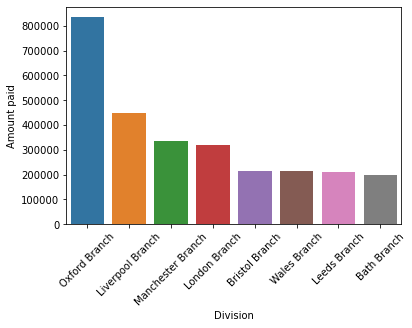

In [48]:
#Division total payments
subpaiddiv = subpaid.groupby(['Division']).sum()
subpaiddiv.sort_values(by='Amount paid',inplace=True, ascending=False)
subpaiddiv = subpaiddiv.reset_index()
chart = sn.barplot( data = subpaiddiv, x = 'Division', y = 'Amount paid')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

In [49]:
#Total amount paid for consultancy by team
subpaid.groupby('Team').sum()

,Amount paid
Team,
BI,410000.0
Credit Risk,495000.0
Customer Service,85000.0
Finance,500000.0
LTL,120000.0
Marketing,600000.0
STL,15000.0
Savings,552000.0


### Extra Charges Overview

In [44]:
#Aditional charges information
subdfall = dfall[['Division','Team','Project','Extra charges']]
extchg = subdfall.groupby(['Division','Team','Project']).sum()
extchg = extchg[extchg['Extra charges'] > 0]
extchg

Extra charges
Division          Team        Project               
Bath Branch       Credit Risk O               5000.0
                  Finance     P               5000.0
Bristol Branch    Finance     F              25000.0
Leeds Branch      Savings     Y              15000.0
Liverpool Branch  BI          S              15000.0
London Branch     Finance     B              15000.0
                  Savings     C                750.0
Manchester Branch Finance     U               2500.0
Oxford Branch     Credit Risk I               7500.0
                  Savings     K              10000.0
Wales Branch      Finance     X               3000.0

In [46]:
#Aditional chanrges by Division
extchg.groupby('Division').sum()

,Extra charges
Division,
Bath Branch,10000.0
Bristol Branch,25000.0
Leeds Branch,15000.0
Liverpool Branch,15000.0
London Branch,15750.0
Manchester Branch,2500.0
Oxford Branch,17500.0
Wales Branch,3000.0


In [45]:
#Aditional chanrges by all company teams
extchg.groupby('Team').sum()

,Extra charges
Team,
BI,15000.0
Credit Risk,12500.0
Finance,50500.0
Savings,25750.0


### Budget vs Amount paid and Extra charges

In [54]:
spent = dfall[['Division','Budget','Amount paid','Extra charges']]
spent = spent.groupby('Division').sum()
spent

,Budget,Amount paid,Extra charges
Division,,,
Bath Branch,197000.0,197000.0,10000.0
Bristol Branch,347000.0,215000.0,25000.0
Leeds Branch,310000.0,210000.0,15000.0
Liverpool Branch,450000.0,450000.0,15000.0
London Branch,500000.0,320000.0,15750.0
Manchester Branch,335000.0,335000.0,2500.0
Oxford Branch,1025000.0,835000.0,17500.0
Wales Branch,465000.0,215000.0,3000.0


In [71]:
#Adition of total ampunt paid which inclused amount paid so far plus aditional charges
totalspent= dfall[['Division','Budget','Amount paid','Extra charges']]
totalspent['Total paid'] = totalspent.loc[:,['Amount paid','Extra charges']].sum(axis=1)
totalspent = totalspent.groupby('Division').sum()
totalspent

<ipython-input-71-778f99c22e07>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totalspent['Total paid'] = totalspent.loc[:,['Amount paid','Extra charges']].sum(axis=1)


,Budget,Amount paid,Extra charges,Total paid
Division,,,,
Bath Branch,197000.0,197000.0,10000.0,207000.0
Bristol Branch,347000.0,215000.0,25000.0,240000.0
Leeds Branch,310000.0,210000.0,15000.0,225000.0
Liverpool Branch,450000.0,450000.0,15000.0,465000.0
London Branch,500000.0,320000.0,15750.0,335750.0
Manchester Branch,335000.0,335000.0,2500.0,337500.0
Oxford Branch,1025000.0,835000.0,17500.0,852500.0
Wales Branch,465000.0,215000.0,3000.0,218000.0


In [59]:
#Branch view
totalspent.loc['London Branch']

Budget           500000.0
Amount paid      320000.0
Extra charges     15750.0
Total paid       335750.0
Name: London Branch, dtype: float64

<AxesSubplot:>

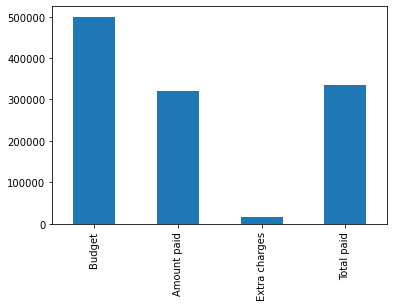

In [65]:
totalspent.loc['London Branch'].plot.bar()

<AxesSubplot:>

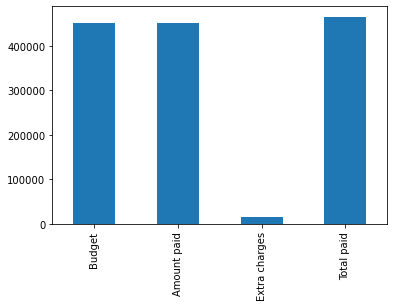

In [68]:
totalspent.loc['Liverpool Branch'].plot.bar()

[Text(0, 0, 'Oxford Branch'),
 Text(1, 0, 'Liverpool Branch'),
 Text(2, 0, 'Manchester Branch'),
 Text(3, 0, 'London Branch'),
 Text(4, 0, 'Bristol Branch'),
 Text(5, 0, 'Leeds Branch'),
 Text(6, 0, 'Wales Branch'),
 Text(7, 0, 'Bath Branch')]

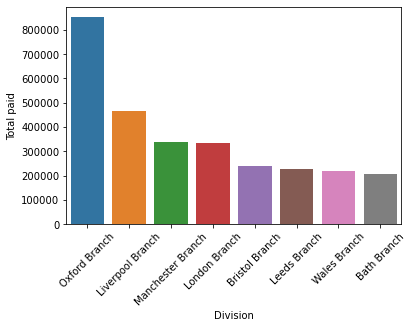

In [75]:
totalspent2 = totalspent.reset_index()
totalspent2 = totalspent2[['Division','Total paid']]
totalspent2.sort_values(by='Total paid',inplace=True, ascending=False)
chart = sn.barplot( data = totalspent2, x = 'Division', y = 'Total paid')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

### Payments Overtime

<ipython-input-30-4273e2b79344>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datedf.sort_values(by='Payment date',inplace=True)


[Text(0, 0, '2020-11-30'),
 Text(1, 0, '2020-12-31'),
 Text(2, 0, '2021-01-31'),
 Text(3, 0, '2021-02-28'),
 Text(4, 0, '2021-03-31'),
 Text(5, 0, '2021-04-30'),
 Text(6, 0, '2021-05-31'),
 Text(7, 0, '2021-06-30'),
 Text(8, 0, '2021-07-31'),
 Text(9, 0, '2021-08-31'),
 Text(10, 0, '2021-09-30'),
 Text(11, 0, '2021-10-31')]

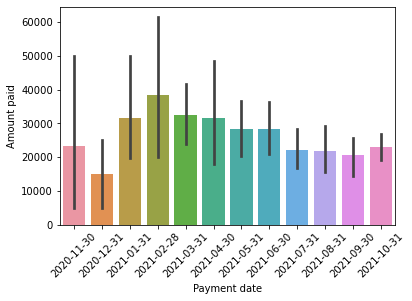

In [30]:
datedf = dfall[['Division','Payment date','Amount paid']]
datedf.sort_values(by='Payment date',inplace=True)
chart = sn.barplot( data = datedf, x = 'Payment date', y = 'Amount paid')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

In [25]:
datedf2 = datedf.groupby(['Payment date']).sum()
datedf2

,Amount paid
Payment date,
2020-11-30,70000.0
2020-12-31,30000.0
2021-01-31,95000.0
2021-02-28,270000.0
2021-03-31,357000.0
2021-04-30,315000.0
2021-05-31,395000.0
2021-06-30,395000.0
2021-07-31,330000.0


<AxesSubplot:xlabel='Payment date'>

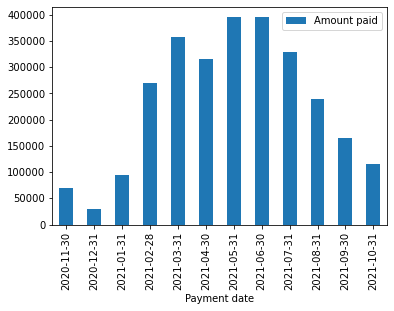

In [26]:
datedf2.sort_index(ascending = True , inplace = True)
datedf2.plot.bar()

### Distribution of charges 

In [38]:
dfdesc2 = dfdesc[['Consultancy Company','Description','Charges']]
dfdescgroup = dfdesc2.groupby(['Description']).sum()
dfdescgroup.sort_values(by='Charges',ascending=False, inplace=True)
dfdescgroup

,Charges
Description,
Original Agreement,3629000
Help Desk,40500
Change Request,35500
Extra Support,20250
Knowledge Transfer,7500


In [39]:
dfdesccc = dfdesc2.groupby(['Consultancy Company','Description']).sum()
dfdesccc.sort_values(by='Charges',ascending=False, inplace=True)
dfdesccc

Charges
Consultancy Company Description                
Company CC          Original Agreement  1230000
Company S           Original Agreement   709000
Company M           Original Agreement   600000
Company B           Original Agreement   600000
Company L           Original Agreement   490000
Company CC          Change Request        27500
                    Help Desk             20000
Company S           Extra Support         10750
                    Help Desk             10000
Company B           Help Desk              7500
Company CC          Extra Support          7500
Company S           Change Request         5000
Company CC          Knowledge Transfer     5000
Company L           Help Desk              3000
Company B           Change Request         3000
                    Knowledge Transfer     2500
                    Extra Support          2000

[Text(0, 0, 'Company CC'),
 Text(1, 0, 'Company S'),
 Text(2, 0, 'Company B'),
 Text(3, 0, 'Company L'),
 Text(4, 0, 'Company M')]

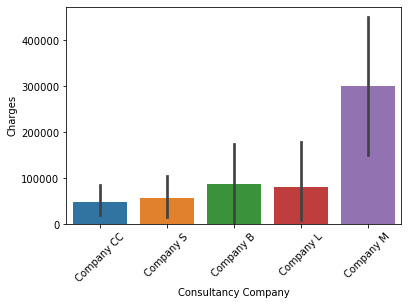

In [41]:
chart = sn.barplot( data = dfdesc2, x = 'Consultancy Company', y = 'Charges')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)